Exploratory Data Analysis Zheyu Ni

This file cleans the Airbnb data. 
1. deleted $ sign and comma in price.
2. visualize price distribution base on different features
3. Price range (0, 800) covers 95\% of the listings
4. 26\% of the listings doesn't have reviews
5. Create a subset of the dataset which doesn't contain missing value in no. of beds and no. of reviews_per_month
6. A quick multivariable regression shows that no. beds, whether the listing has license, whether it's entire room/apt are the 3 most important features contributing to the price without controling for neighborhood. 
7. Among the review ratings (accuracy, clean), the locations rating is strongly correlated to price. 

Next steps will be extracting more features beased on amenity, locations and descriptions.

Also need to check the features contributing to sales (no. reviews)

In [61]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.dates as mdates
from datetime import date
from sklearn.model_selection import train_test_split
import math

In [2]:
df = pd.read_csv('LA\March\listings.csv')


In [18]:
df.head(5)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,777451666060243581,https://www.airbnb.com/rooms/777451666060243581,20230307175359,2023-03-07,city scrape,Family oriented home,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490709958,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,698097753730921190,https://www.airbnb.com/rooms/698097753730921190,20230307175359,2023-03-07,city scrape,方便易居驿站,NaN,NaN,https://a0.muscache.com/pictures/d5afff58-d576...,444692513,...,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,13063118,https://www.airbnb.com/rooms/13063118,20230307175359,2023-03-07,city scrape,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,LOCATION! Luxury upstairs Oceanside Casita gue...,No need to fly away from Los Angeles for a get...,https://a0.muscache.com/pictures/6227287c-7073...,41736985,...,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,39337076,https://www.airbnb.com/rooms/39337076,20230307175359,2023-03-07,city scrape,Brand New Duplex Near World Cruise Center,Welcome to our new cozy duplex!<br /><br />Loc...,"Our property is close to downtown San Pedro, t...",https://a0.muscache.com/pictures/miso/Hosting-...,208375458,...,4.86,4.66,4.82,NaN,t,4,0,4,0,1.09
4,13077628,https://www.airbnb.com/rooms/13077628,20230307175359,2023-03-07,city scrape,Zuma Malibu Retreat,Our Private 16 Acre Malibu Retreat is located ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4182067,...,4.79,4.64,4.36,STR21-0228,f,1,1,0,0,0.18


In [5]:
#column_names =[df.columns,df.dtypes]
#list(column_names)

df.price[0:10]

0      $399.00
1       $46.00
2      $408.00
3       $80.00
4    $2,138.00
5       $55.00
6       $60.00
7       $55.00
8      $129.00
9      $107.00
Name: price, dtype: object

In [11]:
#data cleaning. Price data has $ sign. The following code extracts the number
df['price'] = df['price'].replace({r'\$':''},regex = True).replace({r',':''},regex = True).astype('float')
df.price

0         399.0
1          46.0
2         408.0
3          80.0
4        2138.0
          ...  
42446      40.0
42447      48.0
42448      46.0
42449      68.0
42450      48.0
Name: price, Length: 42451, dtype: float64

In [47]:
#frequency of different room type
print(df['room_type'].value_counts())
print(' ')
print(df['host_response_time'].value_counts())

Entire home/apt    29491
Private room       12180
Shared room          697
Hotel room            83
Name: room_type, dtype: int64
 
within an hour        26037
within a few hours     4341
within a day           2114
a few days or more      584
Name: host_response_time, dtype: int64


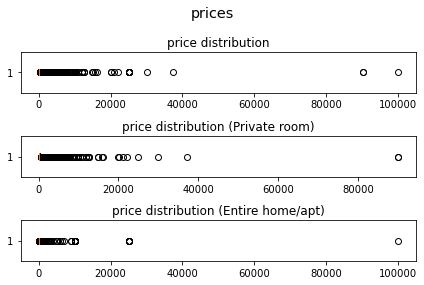

In [104]:

fig =plt.figure()
st=fig.suptitle("prices", fontsize="x-large")
# price distribution
ax1=fig.add_subplot(311)
ax1.boxplot(df.price,vert =0)
ax1.set_title("price distribution")

ax2=fig.add_subplot(312)
#  'room_type' price distribution
ax2.boxplot(df[df['room_type']!='Private room'].price,vert =0)

ax2.set_title("price distribution (Private room)")
fig.tight_layout()

ax3=fig.add_subplot(313)
#  'room_type' price distribution
ax3.boxplot(df[df['room_type']!='Entire home/apt'].price,vert =0)

ax3.set_title("price distribution (Entire home/apt)")
fig.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

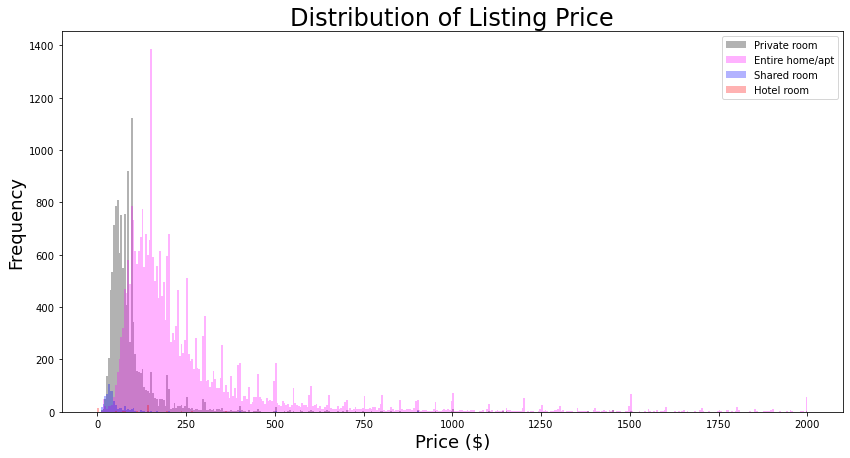

In [122]:
df[df['room_type']=='Private room'].price.plot(kind='hist',color='black',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Entire home/apt'].price.plot(kind='hist',color='magenta',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Shared room'].price.plot(kind='hist',color='blue',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)


plt.legend(labels=['Private room', 'Entire home/apt','Shared room','Hotel room'])
plt.title('Distribution of Listing Price', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)

For hotel rooms: 

Text(0, 0.5, 'Frequency')

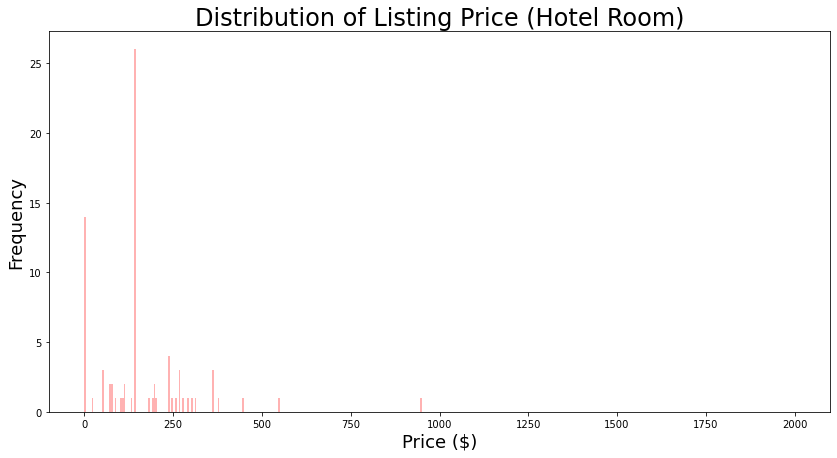

In [121]:
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,2000],alpha=0.3,figsize=(14,7),bins=400)
plt.title('Distribution of Listing Price (Hotel Room)', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)

In [129]:
len(df[df.price<800])
len(df.price)
len(df[df.price<800])/len(df.price)

0.9500836258274246

Price range (0,800) covers 95% of the listing data. 

Plot distribution for range (0,800)

Text(0, 0.5, 'Frequency')

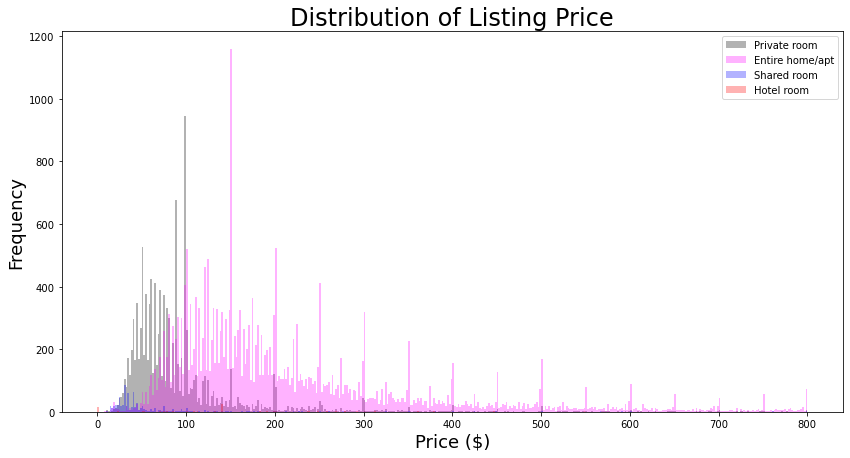

In [131]:
df[df['room_type']=='Private room'].price.plot(kind='hist',color='black',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Entire home/apt'].price.plot(kind='hist',color='magenta',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Shared room'].price.plot(kind='hist',color='blue',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)
df[df['room_type']=='Hotel room'].price.plot(kind='hist',color='red',range=[0,800],alpha=0.3,figsize=(14,7),bins=400)


plt.legend(labels=['Private room', 'Entire home/apt','Shared room','Hotel room'])
plt.title('Distribution of Listing Price', size=24)
plt.xlabel('Price ($)', size=18)
plt.ylabel('Frequency', size=18)


In [105]:
df1=df[df.price<800]
df1.reviews_per_month.isna().sum()/len(df1)


0.2648765248437965

26% of the listings doesn't have reviews

In [190]:
#license dummy. 1: has license. 0: no license


license_dummy=1*(~df1.license.isna()) 
#review dummy. 1: has review. 0: no reviews
review_dummy=1*(~df1.reviews_per_month.isna()) 
#host response time dummies
# Fill NAN by "missing" string
df1[['host_response_time']] = df1[['host_response_time']].fillna('Missing_response')
host_response=pd.get_dummies(df1.host_response_time)
super_host_dummy =1*(df1.host_is_superhost=="t")


#room_type dummy
room_type_dummy=pd.get_dummies(df1.room_type)

#bedrooms 
#df1.bedrooms, df1.beds


C:\Users\nzy12\AppData\Local\Temp\ipykernel_43728\2257748850.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['host_response_time']] = df1[['host_response_time']].fillna('Missing_response')
C:\Users\nzy12\AppData\Local\Temp\ipykernel_43728\2257748850.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['room_type']] = df1[['room_type']].fillna('Missing_room_type')


In [120]:
print(str(100*round(sum(license_dummy)/len(df1),3))+" percentage has license")

print(str(100*round(sum(review_dummy)/len(df1),3))+" percentage has reviews")
print(str(100*round(df1.bedrooms.isna().sum()/len(df1),3))+" percentage has missing bedrooms data")
print(str(100*round(df1.beds.isna().sum()/len(df1),3))[0:3]+" percentage has missing beds data")

27.3 percentage has license
73.5 percentage has reviews
8.9 percentage has missing bedrooms data
1.4 percentage has missing beds data


In [90]:
len(df1)

40332

Multivariable regression with with reviews dummy, license dummy, host_response_dummy, host_response_rate, host_acceptance_rate, host_is_superhost



In [192]:
# prepare characteristics
X=pd.concat([license_dummy,review_dummy,host_response.iloc[:,0:-1],df1.host_response_rate,df1.host_acceptance_rate,df1.host_is_superhost,room_type_response],axis=1)
X=pd.concat([license_dummy,review_dummy,host_response.iloc[:,0:-1],super_host_dummy,room_type_dummy.iloc[:,0:-1]],axis=1)

X.head()

# check nan value
X.isna().sum()

license               0
reviews_per_month     0
Missing               0
a few days or more    0
within a day          0
within a few hours    0
host_is_superhost     0
Entire home/apt       0
Hotel room            0
Private room          0
dtype: int64

In [193]:
Y=df1.price
X=sm.add_constant(X)
mod = sm.OLS(Y,X)
est = mod.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1073.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        19:06:16   Log-Likelihood:            -2.5075e+05
No. Observations:               40332   AIC:                         5.015e+05
Df Residuals:                   40321   BIC:                         5.016e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 57.1846      4

In [242]:
# get the subset of the data without missing 

df2= df1[~df1.beds.isna()&~df1.reviews_per_month.isna()&~df1.review_scores_accuracy.isna()&~df2.review_scores_checkin.isna()
         &~df2.review_scores_communication.isna()&~df2.review_scores_location.isna()&~df2.review_scores_value.isna()]
len(df2)/len(df1)

0.720346127144699

In [243]:
Y=df2.price

license_dummy=1*(~df2.license.isna()) 
# Fill NAN by "missing" string
df2[['host_response_time']] = df2[['host_response_time']].fillna('Missing_response')
host_response_dummy=pd.get_dummies(df2.host_response_time)
#room_type dummy
room_type_dummy=pd.get_dummies(df2.room_type)
super_host_dummy =1*(df2.host_is_superhost=="t")
neighbourhood_dummy =pd.get_dummies(df2.neighbourhood_cleansed)
X=pd.concat([df2.reviews_per_month,df2.beds,license_dummy,host_response_dummy,room_type_dummy,super_host_dummy,
             df2.review_scores_rating,df2.review_scores_accuracy,df2.review_scores_checkin,df2.review_scores_communication,
           df2.review_scores_location,df2.review_scores_value],axis=1)
             
             #df2.host_response_rate,df2.host_acceptance_rate,df2.host_is_superhost,df2.room_type],axis=1)
X=sm.add_constant(X)
mod = sm.OLS(Y,X)
est = mod.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     1167.
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        19:34:07   Log-Likelihood:            -1.7631e+05
No. Observations:               29053   AIC:                         3.527e+05
Df Residuals:                   29035   BIC:                         3.528e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

C:\Users\nzy12\AppData\Local\Temp\ipykernel_43728\4223623792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['host_response_time']] = df2[['host_response_time']].fillna('Missing_response')


In [227]:
#with neighborhood characteristics
X=pd.concat([df2.reviews_per_month,df2.beds,license_dummy,host_response_dummy,...
             room_type_dummy,super_host_dummy,,df2.review_scores_rating,neighbourhood_dummy],axis=1)
             
             #df2.host_response_rate,df2.host_acceptance_rate,df2.host_is_superhost,df2.room_type],axis=1)
X=sm.add_constant(X)
mod = sm.OLS(Y,X)
est = mod.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     105.1
Date:                Thu, 18 May 2023   Prob (F-statistic):               0.00
Time:                        19:25:45   Log-Likelihood:            -1.7515e+05
No. Observations:               29274   AIC:                         3.508e+05
Df Residuals:                   28998   BIC:                         3.531e+05
Df Model:                         275                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------